<a href="https://colab.research.google.com/github/Kelvin-M-Njoki/data_monday/blob/main/Copy_of_Unsupervised_Deep_Dive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model Deep Dive
* PCA
* Tsne
* Kmeans
* DBSCAN

Let's take a closer look into the models:
1. What makes them tick?
2. How they work?
3. How they are interpreted?

### Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/wine_clustering.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#EDA

In [ ]:
# Summary statistics
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
# Missing values
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
# Data types
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

## Correlation matrix

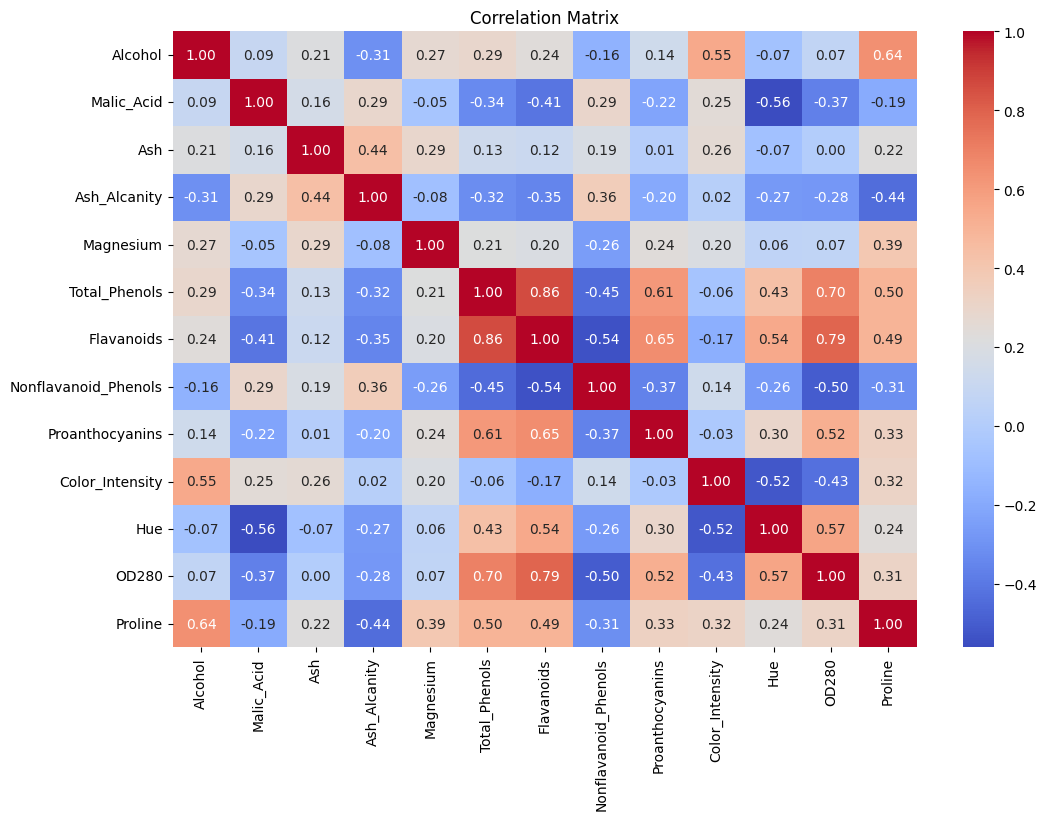

In [ ]:
corr_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Distribution of features

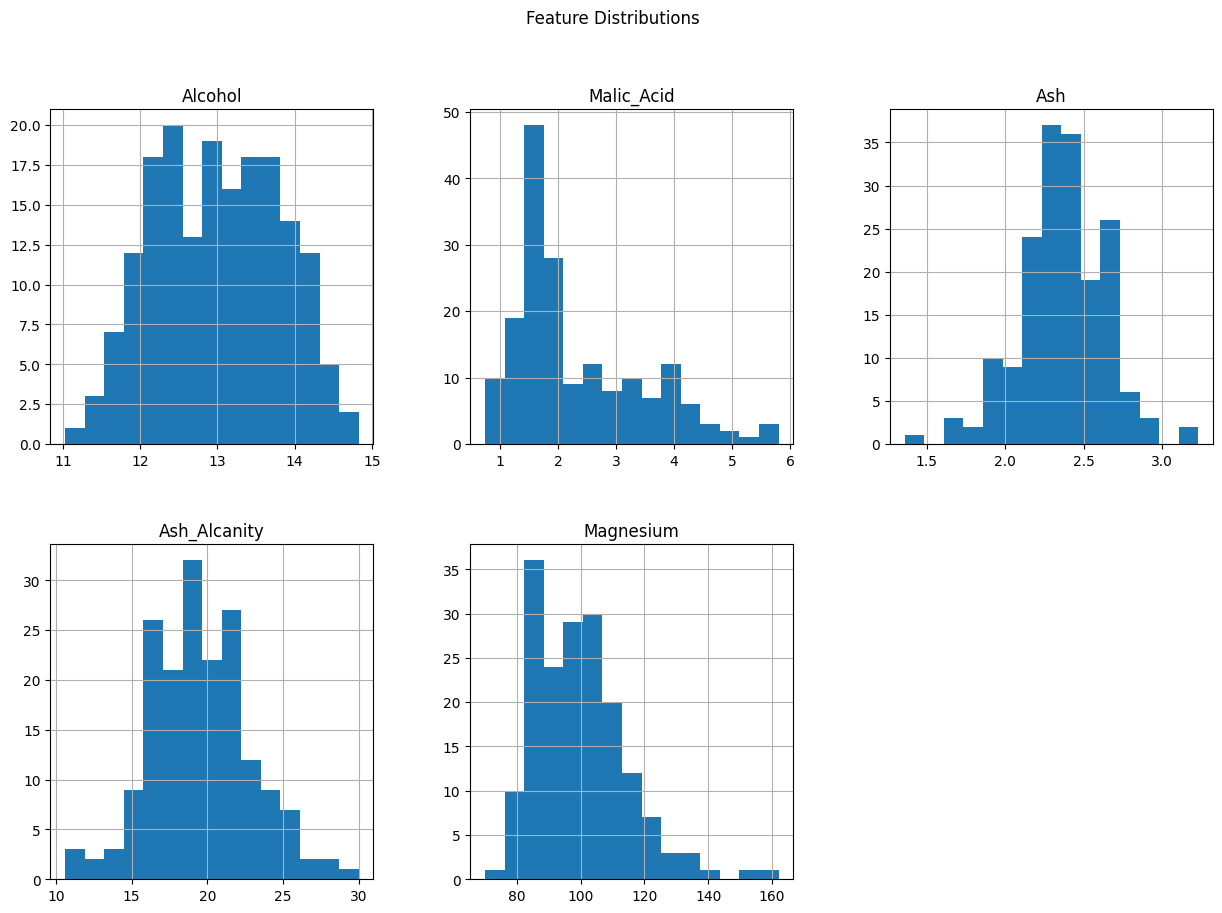

In [ ]:
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium']
data[features].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Feature Distributions')
plt.show()


## Pairwise scatter plots

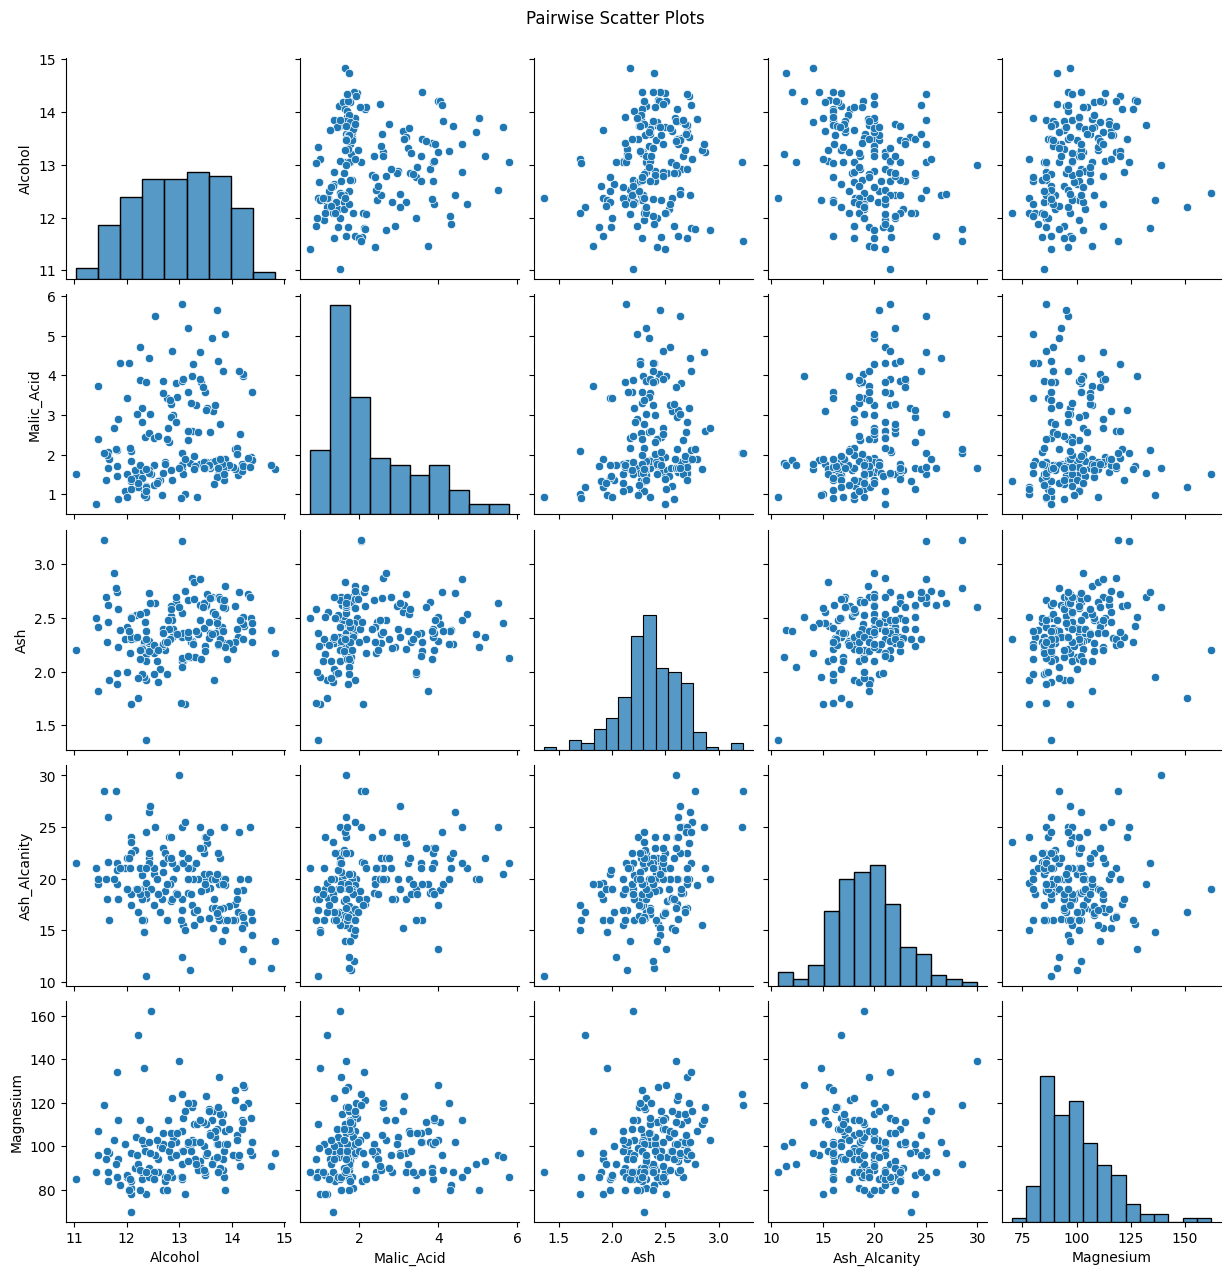

In [ ]:
sns.pairplot(data[features])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Boxplots for outliers

In [ ]:
df_temp = data.drop('Proline',axis = 1)
df_temp.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93


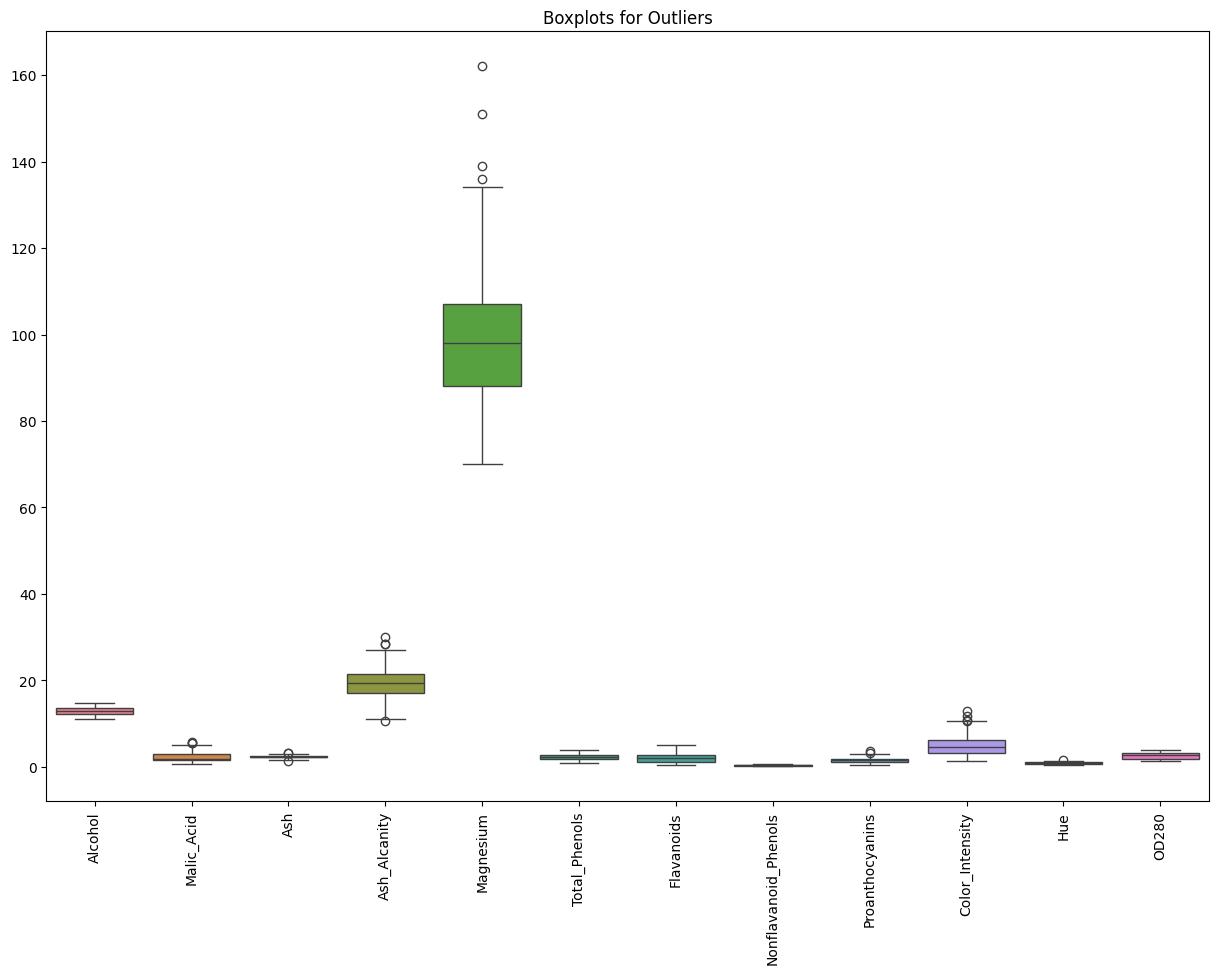

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_temp)
plt.xticks(rotation=90)
plt.title('Boxplots for Outliers')
plt.show()


## What should we do with outliers in Unsupervised Learning?

## ClusterMap


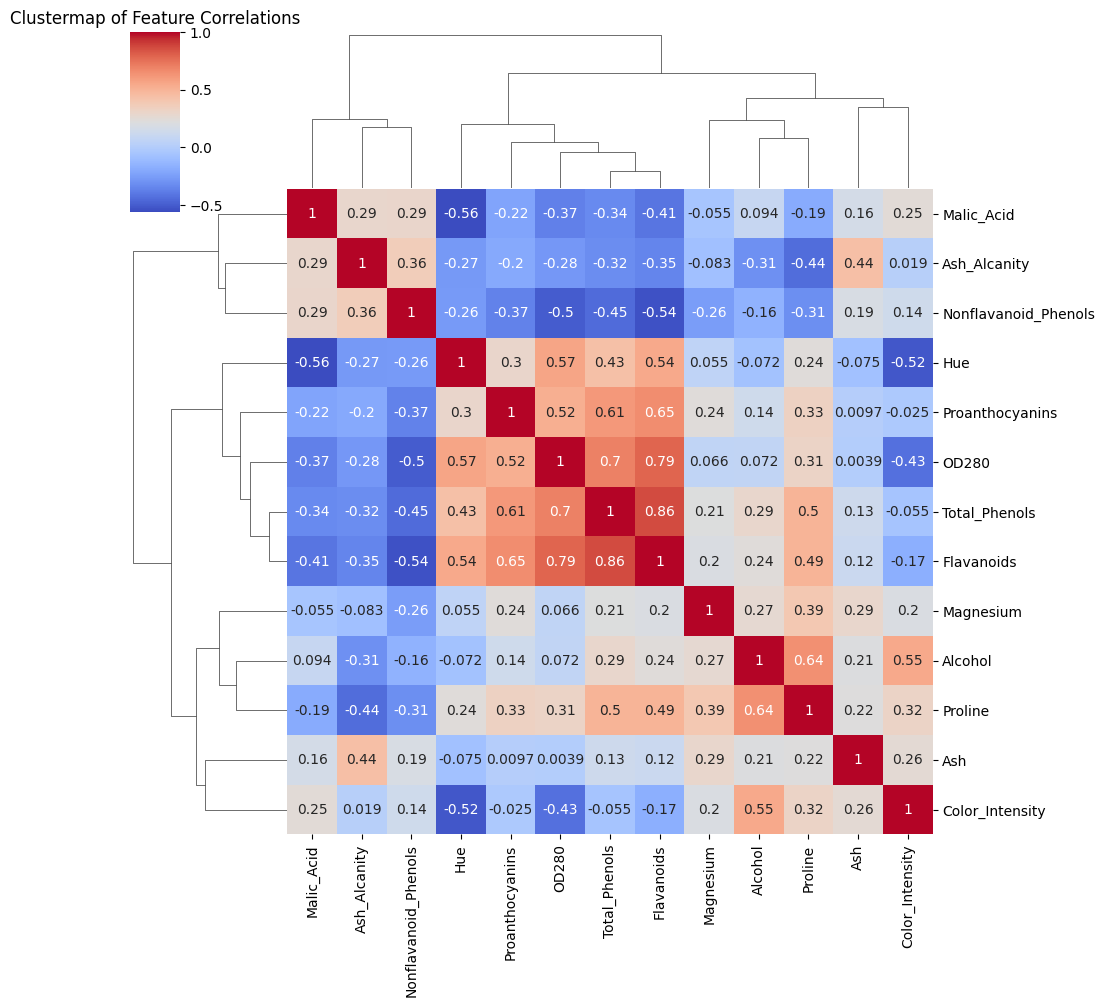

In [ ]:
# Clustermap
sns.clustermap(data.corr(), annot=True, cmap='coolwarm', figsize=(10, 10))
plt.title('Clustermap of Feature Correlations')
plt.show()

# PCA vs T-SNE

### **Principal Component Analysis (PCA)**
* **Assumptions**: Linear relationships among variables
* **How It Works**: Reduces the dimensionality of the dataset while preserving as much variance as possible

* **Scenario Example**:
Visualizing high-dimensional wine data in 2D or 3D

### **t-Distributed Stochastic Neighbor Embedding (t-SNE)**
* **Assumptions**: No specific assumptions about data distribution
* **How It Works**: Reduces dimensions by modeling pairwise similarities in high-dimensional data and low-dimensional embedding
* **Scenario Example:**
Creating a 2D map of wines to identify clusters visually


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


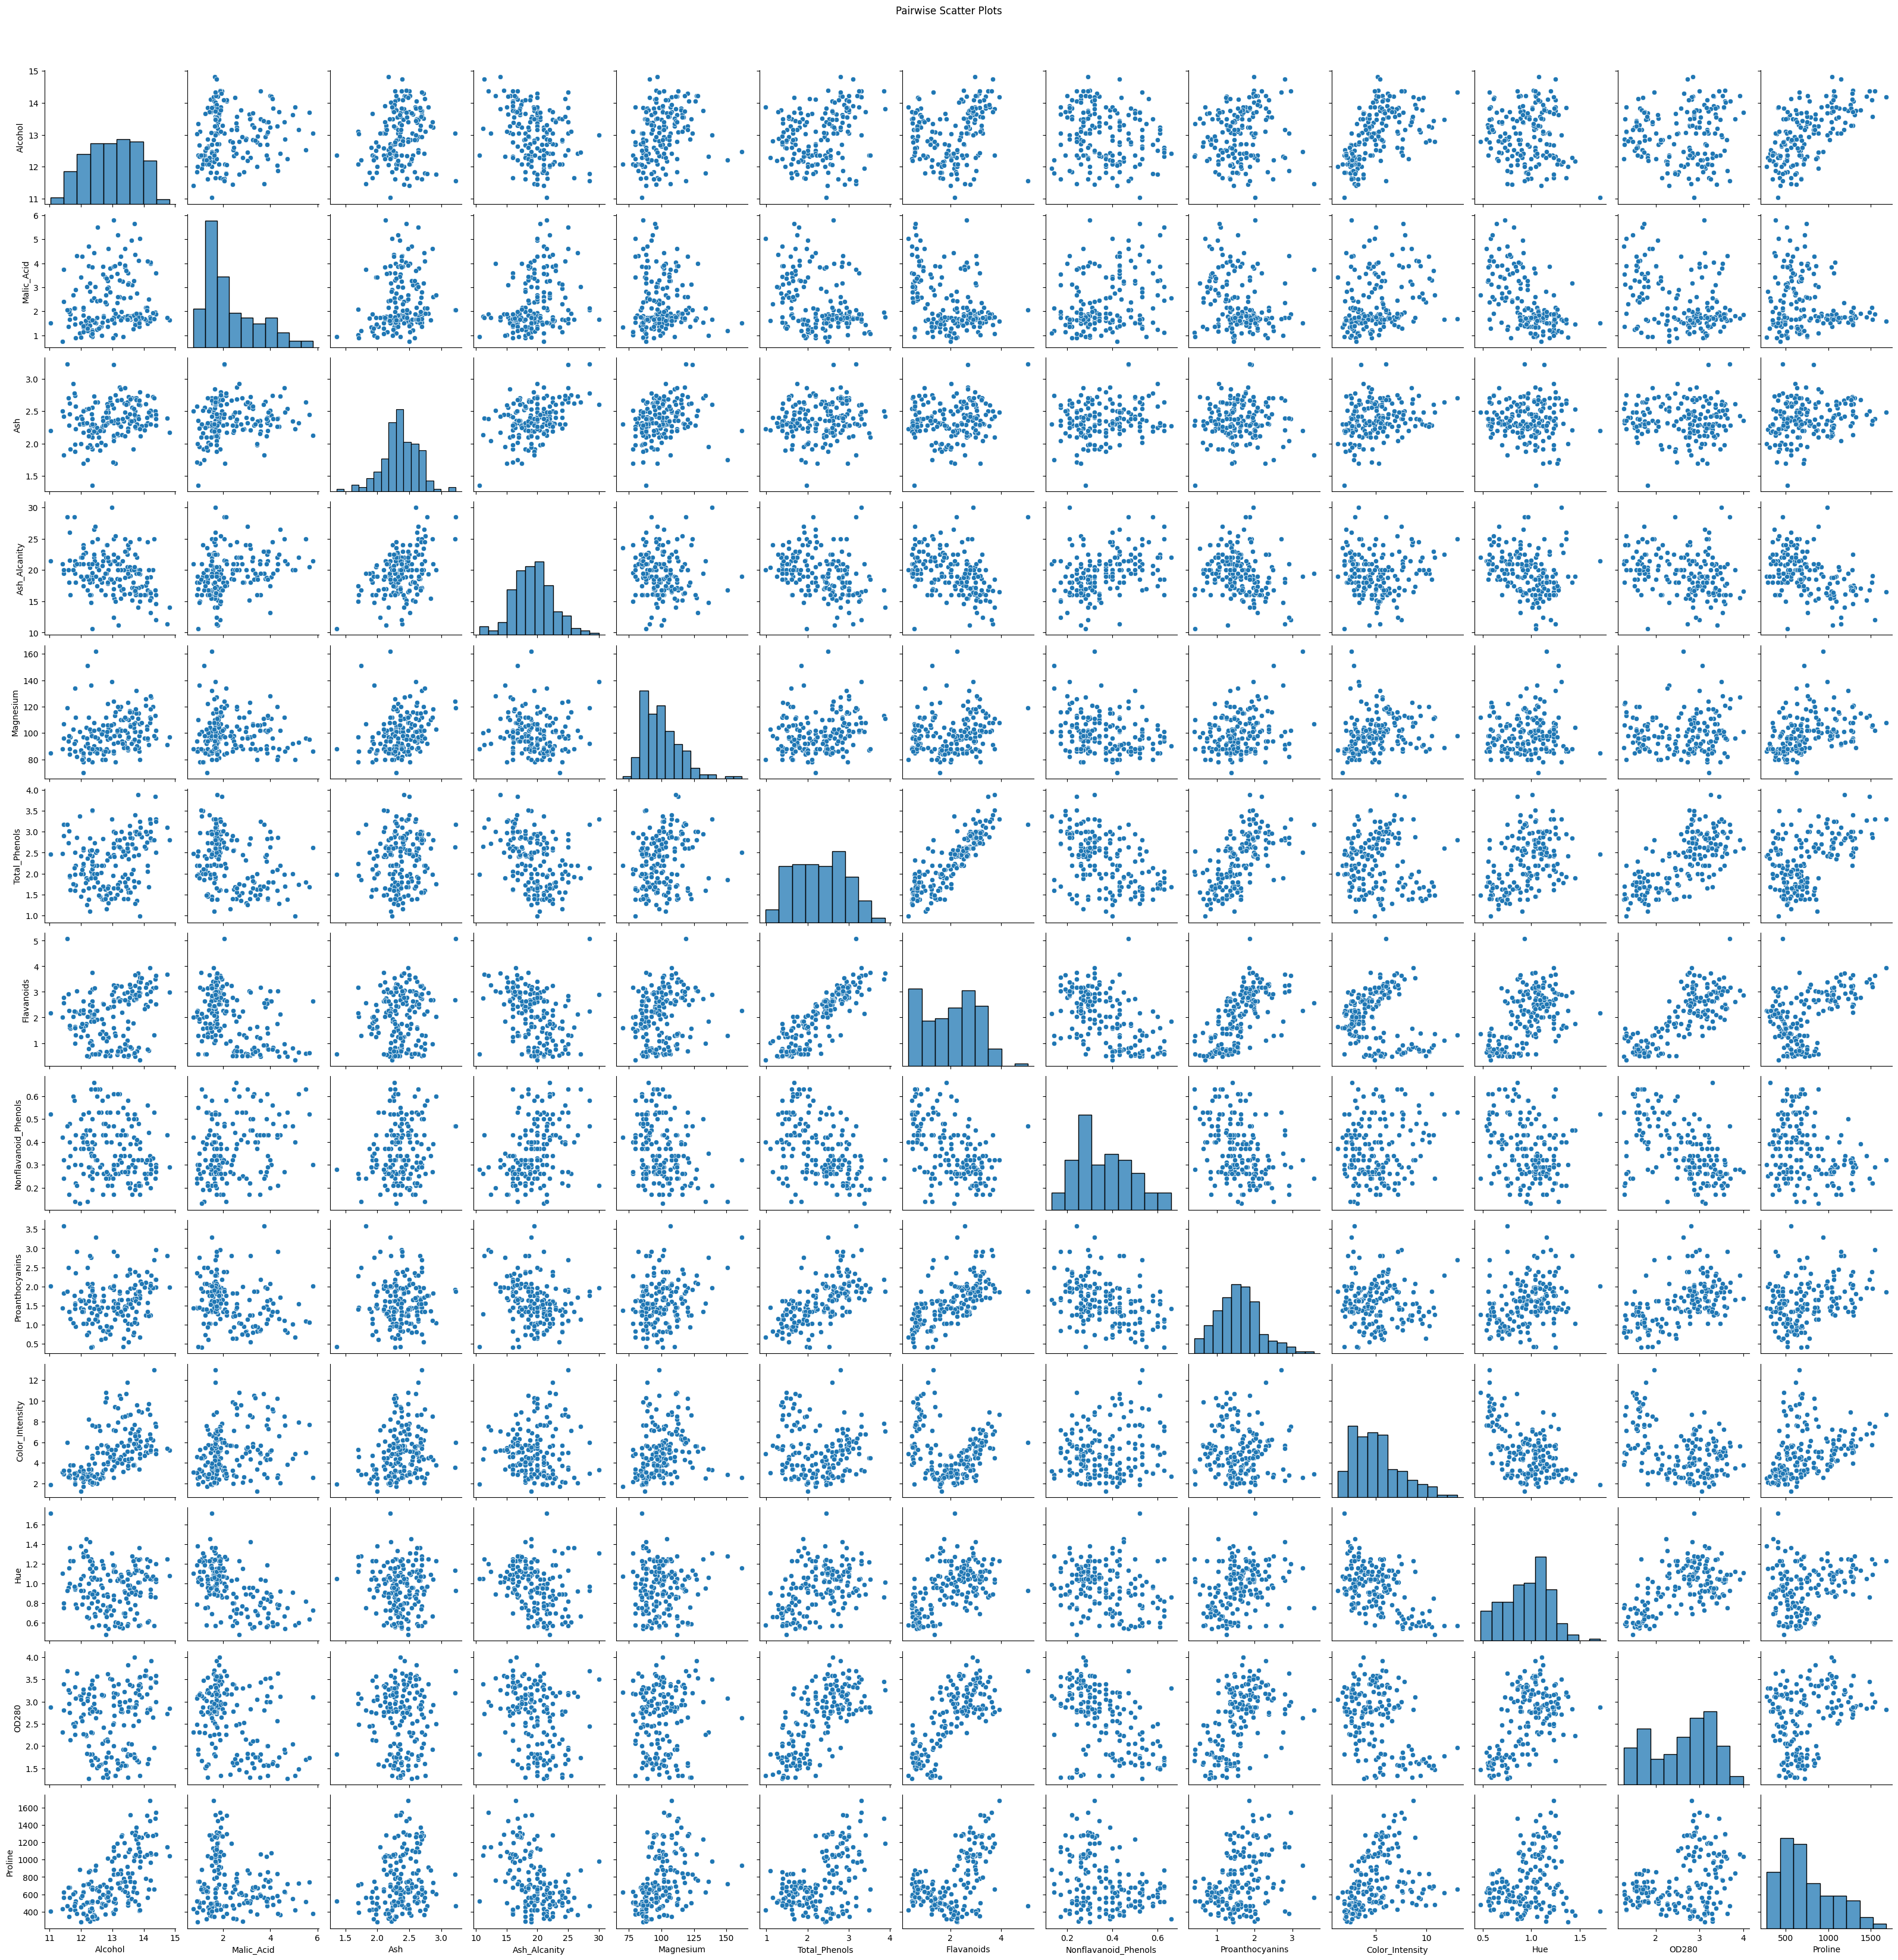

KeyError: 'Alcohol'

In [ ]:
import seaborn as sns
from scipy.stats import pearsonr


# List of column names to check for linearity
columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
           'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
            'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

# 1. Visual Inspection using Pairwise Scatter Plots
sns.pairplot(data[columns])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()


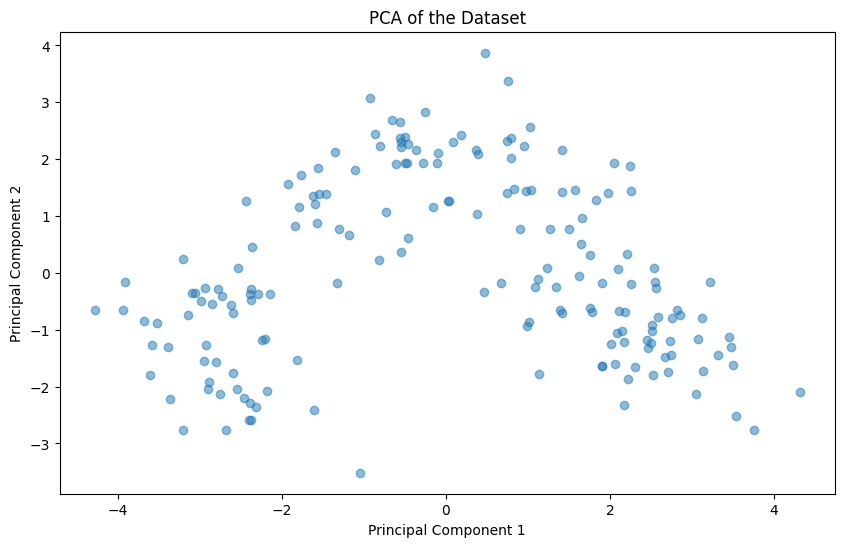

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Plotting the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA of the Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### PCA
**Variance Explained:**

* The first principal component (PC1) captures the most variance in the data, and each subsequent component captures the remaining variance in descending order.
* A scatter plot of PC1 vs. PC2 shows how well the data can be represented in 2D while preserving the most variance.

![](https://keep.google.com/u/0/media/v2/14zOhjW9GXDRgSGRT0Qz9zq5714oAHdaX82iJFtqVTT8GvSELhvy27iSQpu8KGA/1mCN1DAQwk9y5l6gXUiQqJhTquXmoIMDDdAEqofwGkNsYbU6F1L_BfQ1GiOqe?sz=512&accept=image%2Fgif%2Cimage%2Fjpeg%2Cimage%2Fjpg%2Cimage%2Fpng%2Cimage%2Fwebp)

**Clusters and Patterns:**

* If clusters are visible, it indicates groups of observations that are similar in terms of the features that contribute most to the principal components.
* Overlapping points or lack of clear clusters suggest that linear relationships alone might not capture complex structures in the data.



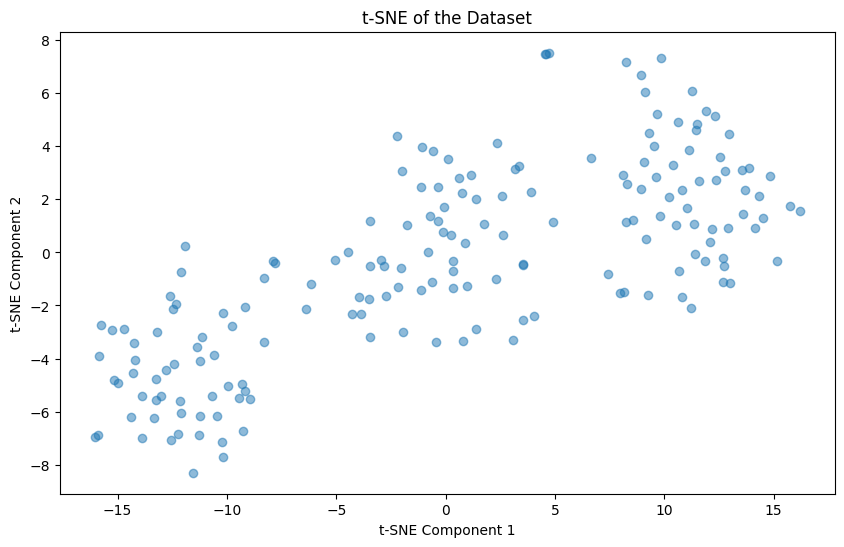

In [ ]:
from sklearn.manifold import TSNE

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])

# Plotting the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], alpha=0.5)
plt.title('t-SNE of the Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


### T-SNE

**Clusters and Local Neighborhoods:**

* Clusters in the t-SNE plot indicate groups of observations that are similar to each other.
* t-SNE is effective for visualizing high-dimensional data in a way that emphasizes local neighborhoods.

**Interpretation of Clusters:**

* Points close to each other in the t-SNE plot are similar in high-dimensional space.
* Be cautious about over-interpreting distances between clusters, as t-SNE focuses on local rather than global structure.

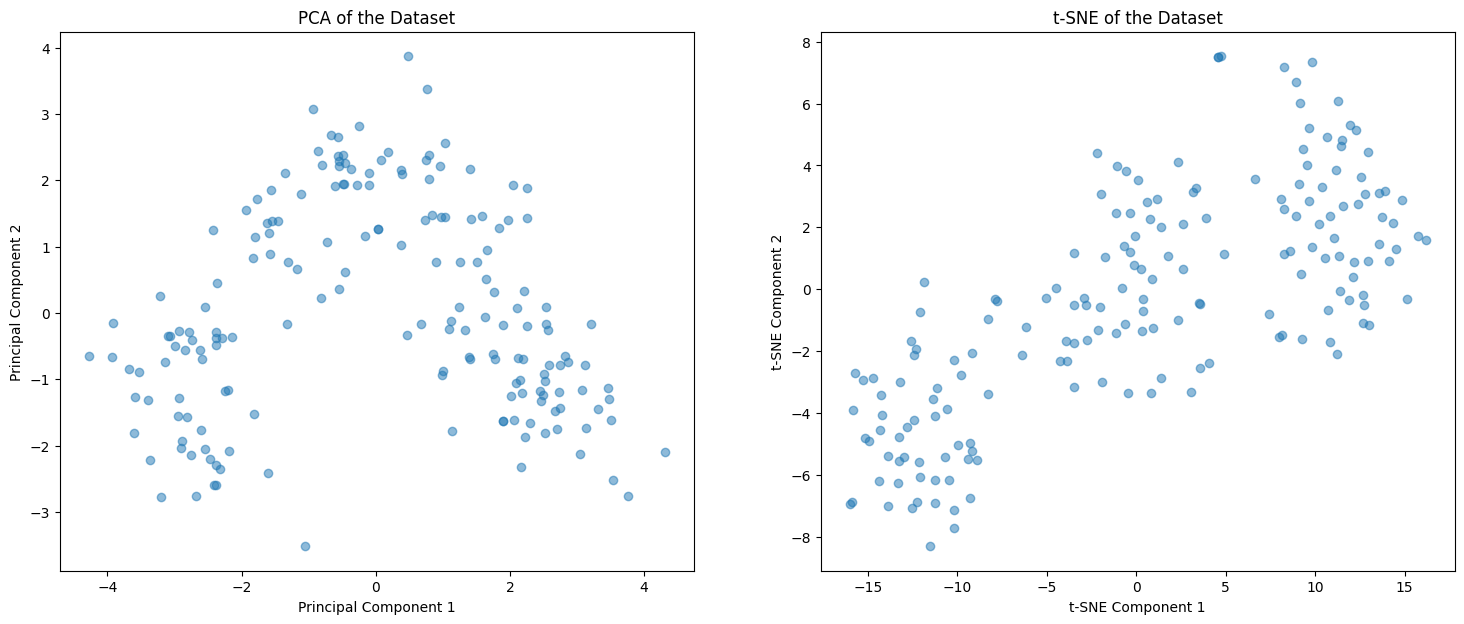

In [ ]:
# Side by side comparison of PCA and t-SNE
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# PCA plot
ax[0].scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
ax[0].set_title('PCA of the Dataset')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# t-SNE plot
ax[1].scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], alpha=0.5)
ax[1].set_title('t-SNE of the Dataset')
ax[1].set_xlabel('t-SNE Component 1')
ax[1].set_ylabel('t-SNE Component 2')

plt.show()


# K-Means Clustering
**Algorithm Steps:**
1. Initialize centroids randomly.
2. Assign each point to the nearest centroid.
3. Recalculate centroids as the mean of assigned points.
4. Repeat steps 2-3 until convergence.

**Assumptions:**
* Clusters are of similar size and shape.
* Data points are spherical and evenly distributed.

**Advantages**:
* Simple to implement and understand.
* Efficient for large datasets.
**Limitations**:
* Sensitive to the initial placement of centroids.
* Struggles with clusters of varying shapes and densities.


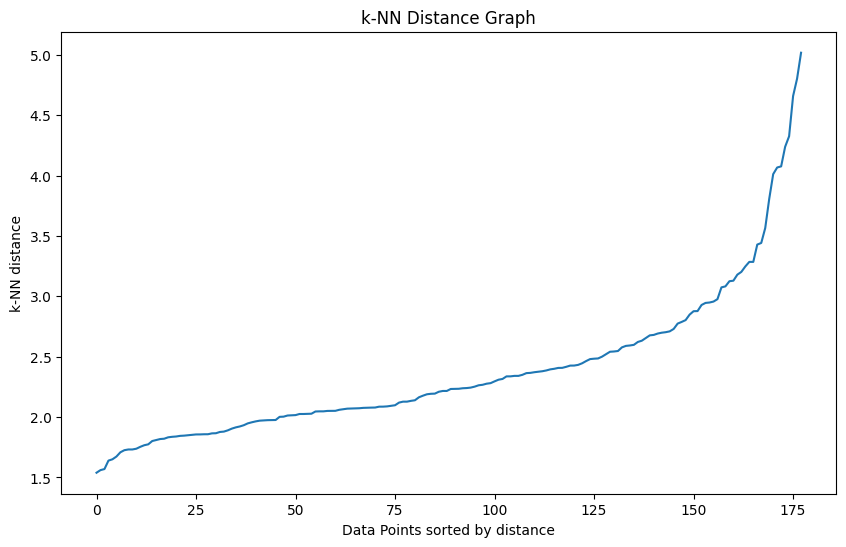

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Calculate the k-NN distances
k = 5  # This should be the same as min_samples in DBSCAN
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort the distances and plot
distances = np.sort(distances[:, k-1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-NN Distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('k-NN distance')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Add K-means labels to the DataFrame
data['KMeans_Labels'] = kmeans_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# DBSCAN
**Algorithm Steps:**
1. Select an arbitrary point.
2. Retrieve all points density-reachable from that point (within eps distance).
3. Form a cluster if a minimum number of points (min_samples) are within eps.
4. Mark points as noise if they are not part of any cluster.

**Assumptions**:
* Clusters are dense regions in space.
* No assumptions about the number of clusters or their shapes.

**Advantages**:
* Can find arbitrarily shaped clusters.
* Robust to outliers.

**Limitations**:
* Requires careful parameter tuning.
* Struggles with clusters of varying density.


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN labels to the DataFrame
data['DBSCAN_Labels'] = dbscan_labels

## Comparison

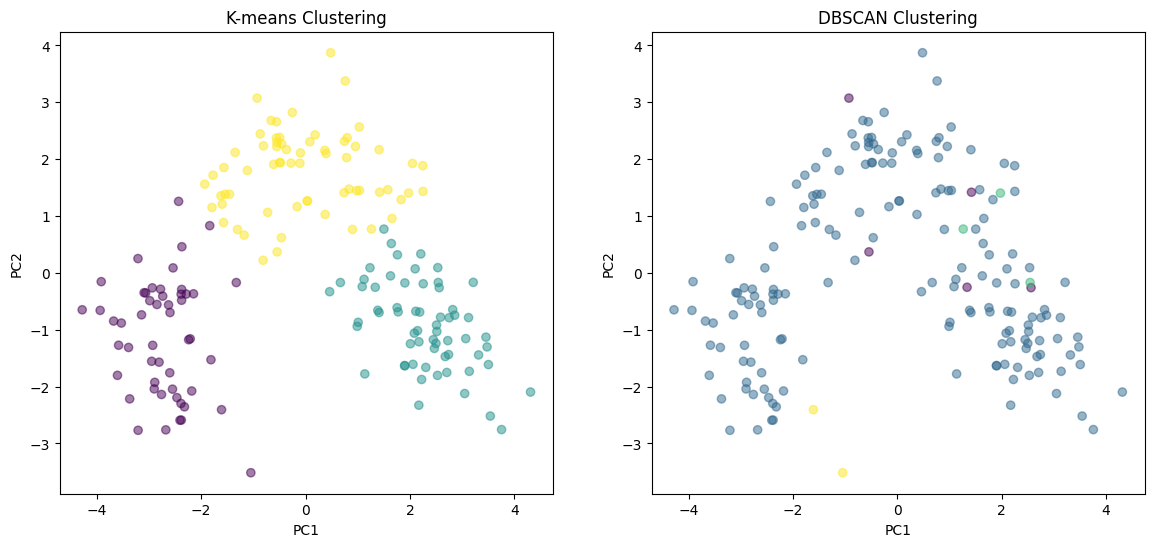

In [ ]:
# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Add clustering labels to the PCA DataFrame
pca_df['KMeans_Labels'] = kmeans_labels
pca_df['DBSCAN_Labels'] = dbscan_labels

# Plot K-means clustering results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['KMeans_Labels'], cmap='viridis', alpha=0.5)
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot DBSCAN clustering results
plt.subplot(1, 2, 2)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['DBSCAN_Labels'], cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()


**K-means:**

* Look at how well-defined and separated the clusters are.
* Check if the number of clusters makes sense, 3 clusters were chosen.

**DBSCAN:**

* Observe the density-based clusters and any identified outliers.
* Compare the clustering to K-means to see if DBSCAN identifies more nuanced structure or noise in the data.

### This is not great

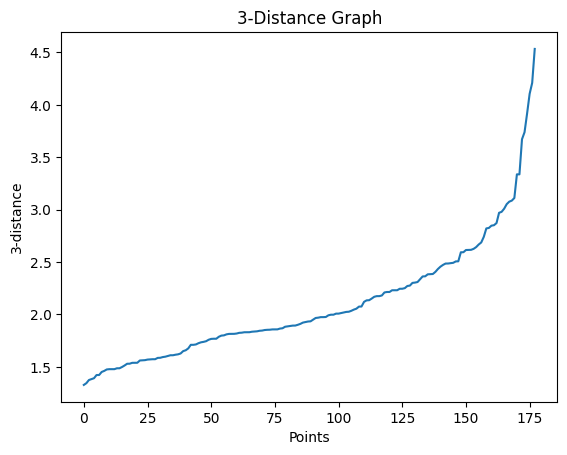

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Assuming X is your dataset
# X should be a numpy array where each row represents a data point
# You may need to normalize your data before running DBSCAN

# Calculate the distance to the kth nearest neighbor
k = 3
nbrs = NearestNeighbors(n_neighbors=k).fit(scaled_data)
distances, _ = nbrs.kneighbors(scaled_data)

# Sort the distances
distances = np.sort(distances[:, -1])

# Plot the sorted distances
plt.plot(np.arange(len(distances)), distances)
plt.xlabel('Points')
plt.ylabel(f'{k}-distance')
plt.title(f'{k}-Distance Graph')
plt.show()


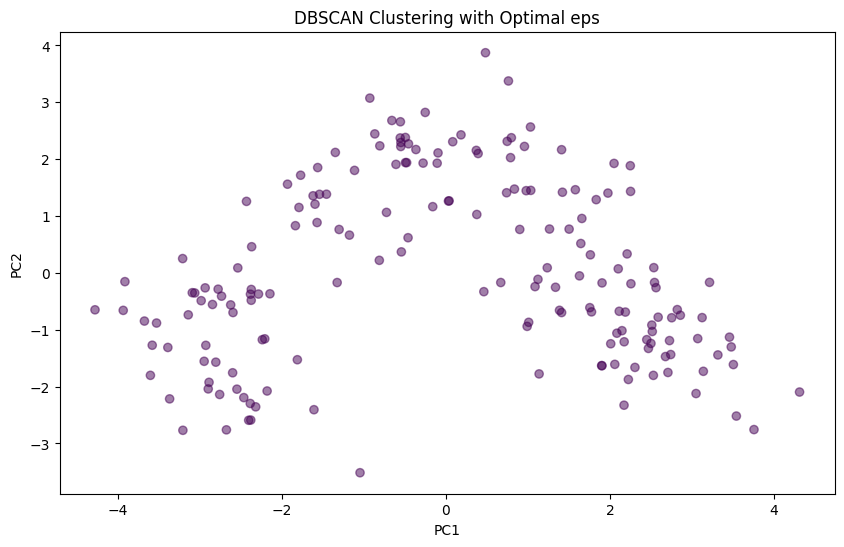

In [ ]:
# Apply DBSCAN with the chosen eps value
chosen_eps = 0.5  # Replace this with the value determined from the k-distance graph
dbscan = DBSCAN(eps=chosen_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN labels to the DataFrame
data['DBSCAN_Labels'] = dbscan_labels

# Visualize the results using PCA
from sklearn.decomposition import PCA

# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['DBSCAN_Labels'] = dbscan_labels

# Plot DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['DBSCAN_Labels'], cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering with Optimal eps')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Application of K-means

In [ ]:
# Assuming you have already performed k-means clustering and obtained cluster labels
# kmeans_labels should be a numpy array containing the cluster labels for each data point

# Initialize and fit the k-means model
kmeans = KMeans(n_clusters=3)  # Assuming 3 clusters for example
kmeans.fit(data)

# Get the cluster labels assigned by k-means
kmeans_labels = kmeans.labels_

# Now, you can associate each data point in X with its corresponding cluster label
# For example, you can create a new numpy array with two columns: the original data and the cluster labels

# Combine original data with cluster labels
data_with_labels = np.column_stack((data, kmeans_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans_Labels,DBSCAN_Labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,-1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,-1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,-1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,-1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,-1


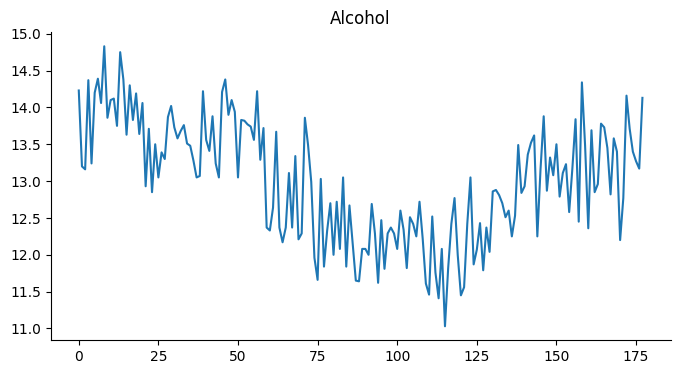

In [ ]:
# @title Alcohol

from matplotlib import pyplot as plt
data['Alcohol'].plot(kind='line', figsize=(8, 4), title='Alcohol')
plt.gca().spines[['top', 'right']].set_visible(False)

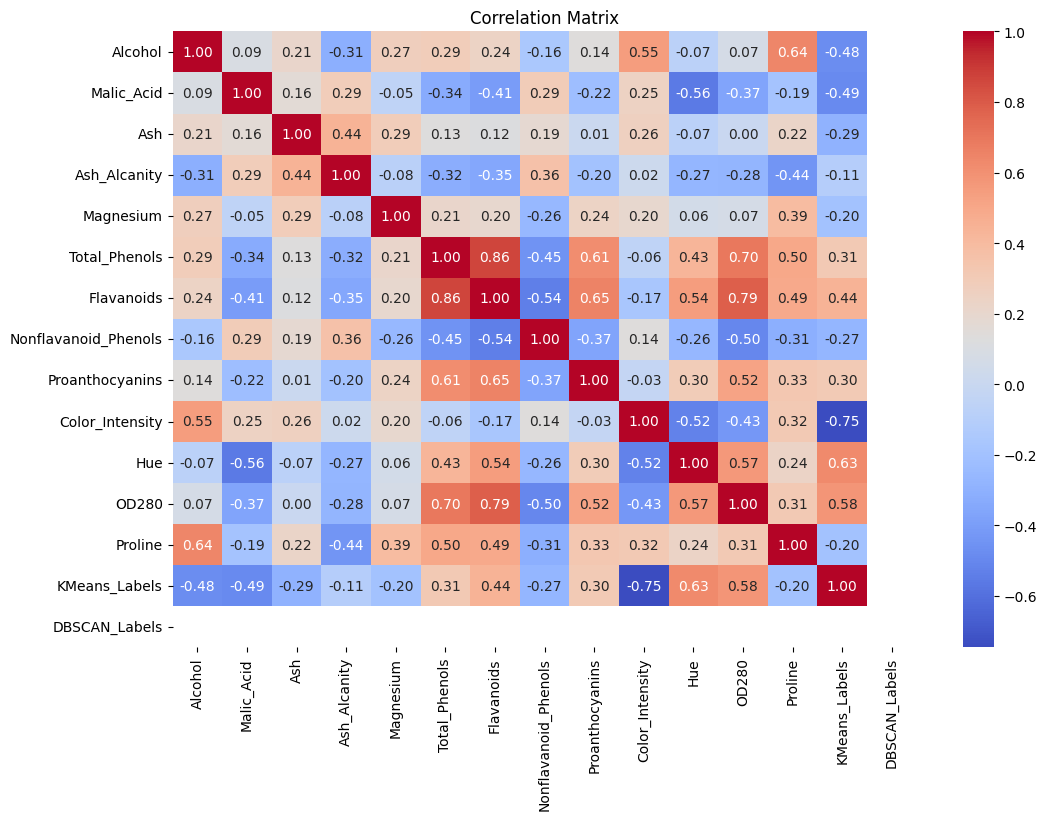

In [ ]:
corr_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

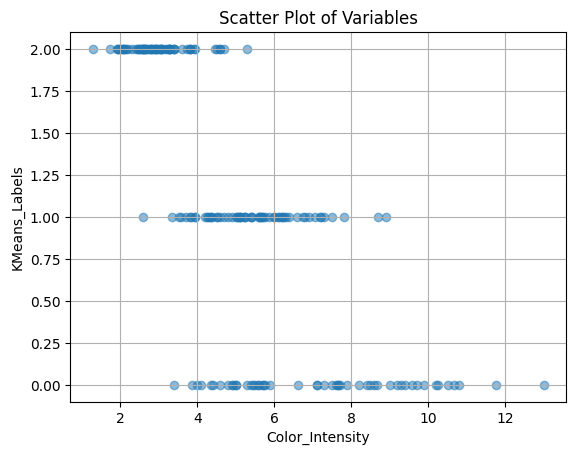

In [ ]:
# Plot the variables
plt.scatter(data['Color_Intensity'], data['KMeans_Labels'], alpha=0.5)

# Add labels and title
plt.xlabel('Color_Intensity')
plt.ylabel('KMeans_Labels')
plt.title('Scatter Plot of Variables')

# Add grid
plt.grid(True)

# Show plot
plt.show()

### What do we do now
* Feature comparison
* Per cluster, why did the clusters form
* Segmentation optimisation